# Data Preprocessing

In [1]:
import numpy as np
from pathlib import Path
from keras.preprocessing import image
import pickle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## Feature Extraction

In [2]:
#đọc dữ liệu hình ảnh, chuyển đổi


p = Path("data/")
dirs = p.glob("*")
labels_dict = {'IncorrectlyWornMask':0,'WithMask':1,'WithoutMask':2 }
image_data = [] 
labels = []
for folder_dir in dirs:
    print(str(folder_dir))
    label = str(folder_dir).split("/")[-1]
    print("doc anh thanh cong thu muc:",label)
    for img_path in folder_dir.glob("*"):
        try:
            img = image.load_img(img_path, target_size=(32,32))
            img_array = image.img_to_array(img)
            image_data.append(img_array)
            labels.append(labels_dict[label])
        except:
            continue
        
print("image_data train",len(image_data))
print("Labels train",len(labels))
print('# of IncorrectlyWornMask A Mask:', labels.count(0))



data/IncorrectlyWornMask
doc anh thanh cong thu muc: IncorrectlyWornMask
data/.DS_Store
doc anh thanh cong thu muc: .DS_Store
data/WithoutMask
doc anh thanh cong thu muc: WithoutMask
data/WithMask
doc anh thanh cong thu muc: WithMask
image_data train 5995
Labels train 5995
# of IncorrectlyWornMask A Mask: 2103


## Convert to Numpy Array

In [3]:
image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)


## Plot Dataset Images

In [4]:

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)



## Save Dataset as Pickles

In [5]:
#Saves us from having to regenerate our data by saving our data
pickle_out = open("pickle/X.pickle", "wb")
pickle.dump(image_data, pickle_out)
pickle_out.close()

pickle_out = open("pickle/y.pickle", "wb")
pickle.dump(labels, pickle_out)
pickle_out.close()


## Load Pickles

In [6]:
pickle_in = open("pickle/X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("pickle/y.pickle", "rb")
y = pickle.load(pickle_in)


## Total Classification Counts

In [7]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 2).sum())
print('# of Incorrectly Worn Mask:', (y == 0).sum())
print('# of With A Mask:', (y == 1).sum())

# of Samples: 5995
# of Without A Mask: 1910
# of Incorrectly Worn Mask: 2103
# of With A Mask: 1982


## Split Train and Test

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  4796 
Length of our Testing data:  1199


<Axes: xlabel='label', ylabel='count'>

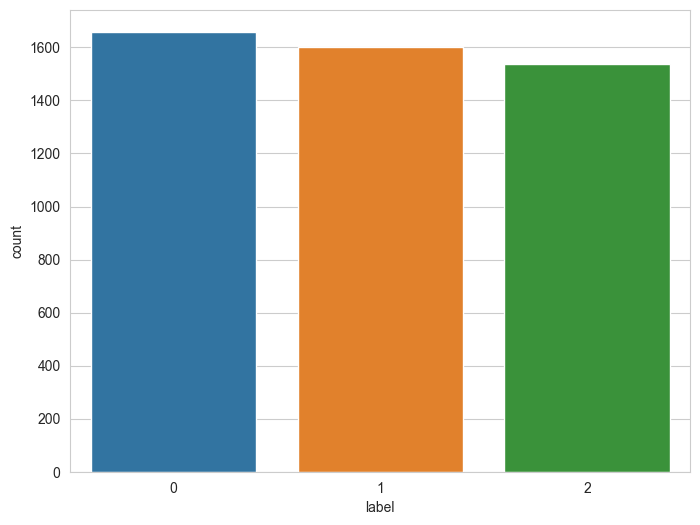

In [9]:
#so sanh dữ liệu train
df_labels = pd.DataFrame(
    y_train,
    columns=['label']
)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_labels, x='label')